<a href="https://colab.research.google.com/github/kapibara3chi/LSTM_test/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.pip

In [1]:
!pip install keras
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install yfinance

# code

出来高を考慮した予測

始値、安値、高値を考慮した予測

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-01-02  44.730000  45.189999  44.500000  45.189999  43.365040  1826300
2018-01-03  45.270000  46.090000  45.250000  45.990002  44.132736  2150800
2018-01-04  46.380001  46.869999  46.320000  46.570000  44.689312  2632000
2018-01-05  47.029999  47.560001  46.740002  47.450001  45.533768  1928900
2018-01-08  47.419998  47.820000  47.250000  47.740002  45.812069  1992500
scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data 
[[0.21874023]
 [0.22460143]
 [0.23296342]
 ...
 [0.76844323]
 [0.74265395]
 [0.75070333]]
training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len 
1269
train_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.sha

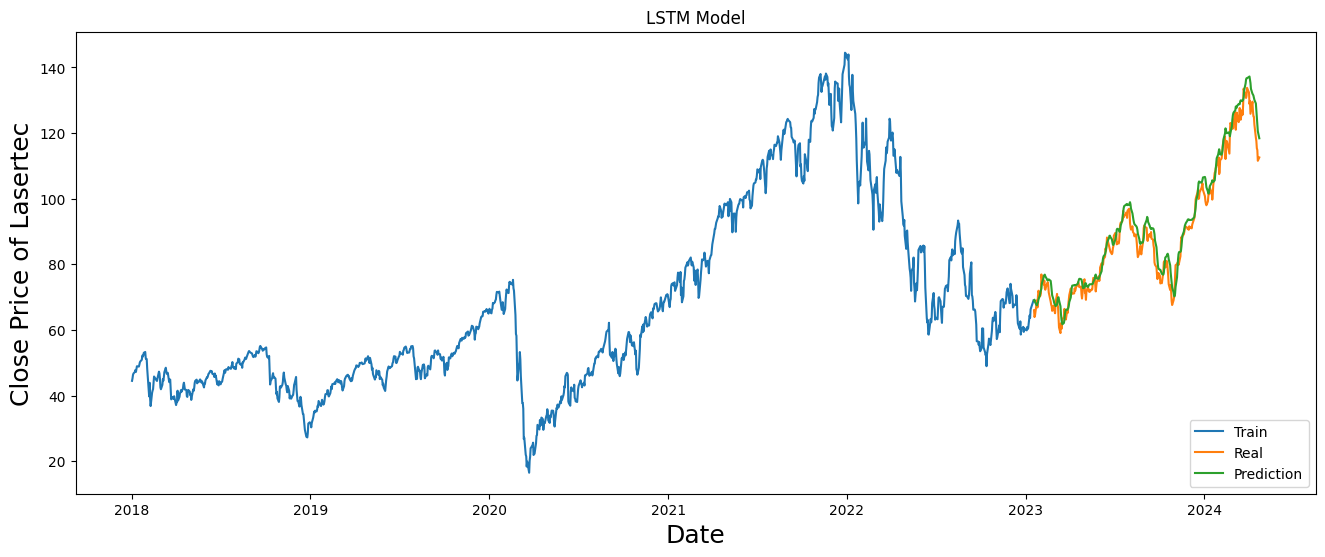

In [3]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
print(df.head())

#　Closeコラムのみ抽出
data = df.filter(["Low"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print("scaled_data "*10)
print(scaled_data)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))
print("training_data_len "*10)
print(training_data_len)

train_data = scaled_data[0: int(training_data_len), :]
print("train_data.shape"*10)
print(train_data.shape)

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print("x_train.shape"*10)
print(x_train.shape)


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
test_score = np.sqrt(mean_squared_error(y_test,predictions))
print('Test Score: %.2f RMSE' % (test_score))

train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price of Lasertec', fontsize =18)
plt.plot(train['Low'])
plt.plot(valid[['Low','Predictions']])
plt.legend(['Train','Real','Prediction'], loc='lower right')
plt.show()

## 予測値のグラフを1日シフト

[*********************100%%**********************]  1 of 1 completed


df:(1589, 6)
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-01-02  44.730000  45.189999  44.500000  45.189999  43.365036  1826300
2018-01-03  45.270000  46.090000  45.250000  45.990002  44.132729  2150800
2018-01-04  46.380001  46.869999  46.320000  46.570000  44.689308  2632000
2018-01-05  47.029999  47.560001  46.740002  47.450001  45.533768  1928900
2018-01-08  47.419998  47.820000  47.250000  47.740002  45.812061  1992500
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-19  115.379997  116.099998  111.540001  112.550003  112.550003   
2024-04-22  114.209999  117.309998  112.570000  115.449997  115.449997   
2024-04-23  116.879997  119.870003  116.500000  119.510002  119.510002   
2024-04-24  120.150002  120.720001  117.739998  119.349998  119.349998   
2024-04-25  114.79

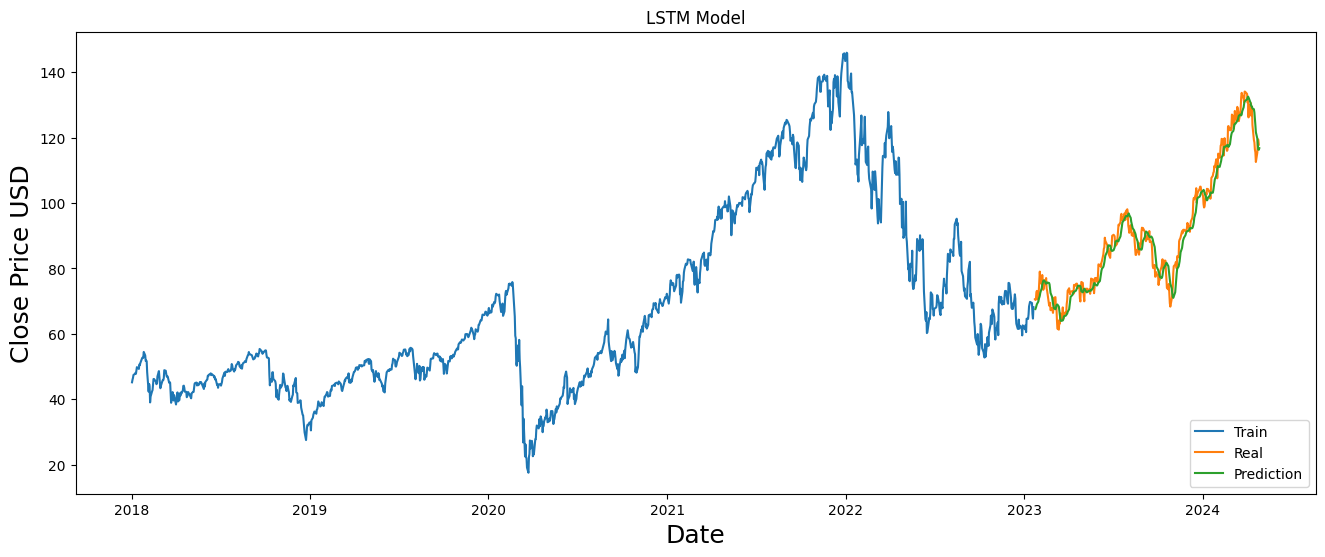

In [12]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
print(f'df:{df.shape}')
print(df.head())
print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(["Close"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))

train_data = scaled_data[0: int(training_data_len), :]
# print(f'train_data.shape:{train_data.shape}')

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
# print(f'x_train.shape:{x_train.shape}')


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
# print(f'len x_test:{x_test.shape}')
# print(x_test[0])
# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# print(f'prediction shape{predictions.shape}')
# print(f'len predictions:{len(predictions)}')
# print(predictions)
print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")
# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
test_score = np.sqrt(mean_squared_error(y_test,predictions))
print('Test Score: %.2f RMSE' % (test_score))

train = data[: training_data_len]
# print(f'train*********************************:{len(train)}')
# print(train.tail())
valid = data[training_data_len:]
# print(f'valid*********************************:{len(valid)}')
# print(valid.tail())
# print(valid)
# validデータセットに予測値を追加
# valid['Predictions'] = predictions
# print("predictions*********************************")
# print(len(predictions))
# print(predictions)

# validデータセットに予測値を追加
valid['Predictions'] = predictions
print(f'valid add predictions*********************************:{len(valid)}')
print(valid.tail())
# 予測値の日付を1日進める
# print(f'prediction index*************')
next_day=valid.index[-1]+pd.DateOffset(days=1)
# print(f'new day:{next_day}')
predictions_index = valid.index.append(pd.Index([next_day]))
predictions_index=predictions_index[1:]
# print(predictions_index)
# print(f'prediction index len; {len(predictions_index)}')
# print(predictions_index)
# 予測値を含む新しいDataFrameを作成
predictions_df = pd.DataFrame(data=predictions, index=predictions_index, columns=['Predictions'])
print(predictions_df.tail())
# グラフ化
plt.figure(figsize = (16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD', fontsize =18)
plt.plot(train['Close'])
# plt.plot(valid['Close'],marker='o')
plt.plot(valid['Close'])
plt.plot(predictions_df['Predictions'])
plt.legend(['Train','Real','Prediction'], loc='lower right')
plt.show()